In [39]:
%pip install pandas numpy statsmodels matplotlib scikit-learn seaborn --user

You are using pip version 19.0.3, however version 23.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [40]:
%pip install aequitas --user

You are using pip version 19.0.3, however version 23.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
from aequitas.preprocessing import preprocess_input_df

In [42]:
df = pd.read_csv("dataset.csv")

In [43]:
#dropping unecessary columns
df.drop(['Nacionality', 'GDP', 'Application order', 'International', 'Inflation rate', 'Unemployment rate', 'Displaced'], axis = 1, inplace = True)
#creating dataframe with only graduate and dropout students
df = df[df.Target != 'Enrolled']

In [44]:
#data cleaning - changing categorical column to numerical column
df['Target'].replace(['Graduate', 'Dropout'], [0, 1], inplace=True)
target = df['Target']

In [45]:
features = df.drop('Target', axis='columns')

<AxesSubplot:>

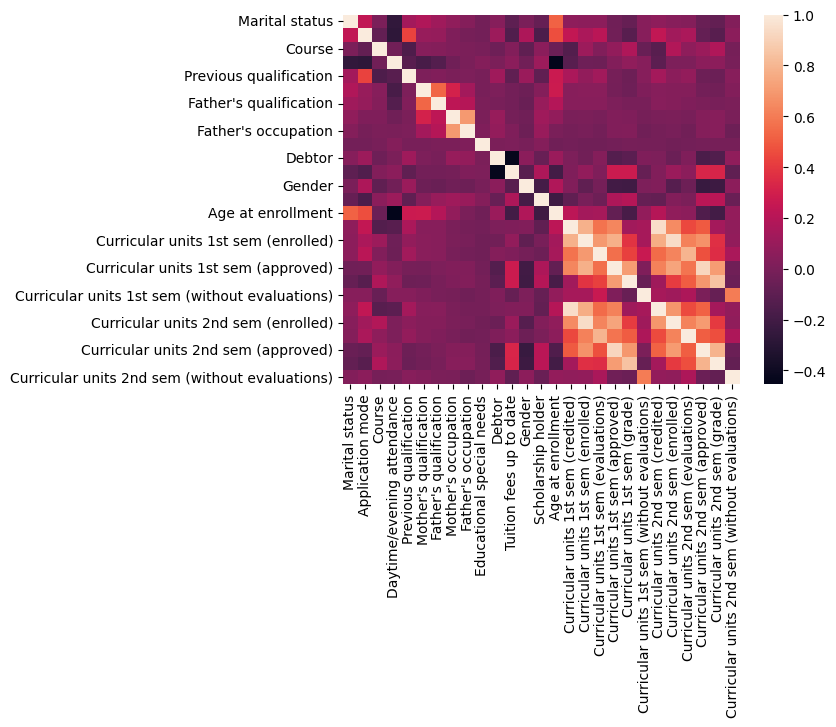

In [46]:
sns.heatmap(features.corr())

In [47]:
correlation = features.corrwith(target).abs().sort_values(ascending=False)
top5Correlation = correlation[:5]
print(top5Correlation)

Curricular units 2nd sem (approved)    0.653995
Curricular units 2nd sem (grade)       0.605350
Curricular units 1st sem (approved)    0.554881
Curricular units 1st sem (grade)       0.519927
Tuition fees up to date                0.442138
dtype: float64


In [48]:
#importing ml stuff
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
df.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,8,2,1,1,13,10,6,10,0,0,1,1,0,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,1
1,1,6,11,1,1,1,3,4,4,0,0,0,1,0,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,0
2,1,1,5,1,1,22,27,10,10,0,0,0,1,0,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,1
3,1,8,15,1,1,23,27,6,4,0,0,1,0,0,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,0
4,2,12,3,0,1,22,28,10,10,0,0,1,0,0,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,0


In [50]:
#training the model
y=df["Target"]
y=y.astype('int')
x_df = df[['Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Tuition fees up to date']]
X=x_df.iloc[:,:-1]



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

model = LogisticRegression()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    model.fit(X=X_train, y=y_train)
    
y_pred = model.predict(X_test)


cel = log_loss(y_test, y_pred)

print("Cross entropy loss:",cel)

y_pred = model.predict(X_test)

# Add predicted values as new column to X_test dataframe
X_test['Predicted'] = y_pred

# Print X_test to verify that predicted values were added
X_test.head()

Cross entropy loss: 4.614709230647109


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Predicted
200,4,14.333333,4,13.750000,0
1869,3,12.666667,6,11.666667,1
958,5,12.666667,5,13.200000,0
2043,6,12.166667,6,12.500000,0
4205,6,13.533333,6,13.533333,0


In [177]:
df_new = pd.merge(df, X_test['Predicted'], how = 'left',left_index = True, right_index = True)
df_new.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Predicted
0,1,8,2,1,1,13,10,6,10,0,0,1,1,0,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,1,NaN
1,1,6,11,1,1,1,3,4,4,0,0,0,1,0,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,0,NaN
2,1,1,5,1,1,22,27,10,10,0,0,0,1,0,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,1,NaN
3,1,8,15,1,1,23,27,6,4,0,0,1,0,0,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,0,0.0
4,2,12,3,0,1,22,28,10,10,0,0,1,0,0,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,0,0.0


In [52]:
df_prepro = df_new[df_new['Predicted'].notna()]

In [178]:
df_prepro.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother qualification,Father qualification,Mother occupation,Father occupation,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),label_value,score,rank_abs,rank_pct,binary_score,binary_fpr,binary_fnr,binary_precision,binary_for,binary_pprev,binary_tnr,binary_tpr,binary_npv,binary_fdr,binary_ppr
1222,1.00-5.00,8.00-12.00,13.00-17.00,0.00-1.00,1.00-17.00,1.00-13.00,27.00-33.00,5.00-6.00,1.00-5.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,0.00-6.00,6.00-8.00,0.00-3.00,0.00-11.00,0.00-12.00,0.00-13.00,0.00-6.00,6.00-8.00,0.00-2.00,0.00-10.67,0.00-12.00,1,1.0,1,0.001377,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
3626,1.00-5.00,1.00-8.00,2.00-6.00,0.00-1.00,1.00-17.00,13.00-22.00,14.00-27.00,1.00-5.00,1.00-5.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,6.00-7.00,10.00-33.00,6.00-21.00,11.00-12.50,0.00-12.00,0.00-13.00,0.00-6.00,10.00-33.00,0.00-2.00,10.67-12.33,0.00-12.00,1,1.0,2,0.002755,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
3716,1.00-5.00,12.00-17.00,6.00-11.00,0.00-1.00,1.00-17.00,1.00-13.00,2.00-14.00,1.00-5.00,10.00-46.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,18.00-20.00,0.00-19.00,0.00-6.00,6.00-8.00,0.00-3.00,11.00-12.50,0.00-12.00,0.00-13.00,0.00-6.00,10.00-33.00,0.00-2.00,10.67-12.33,0.00-12.00,1,1.0,3,0.004132,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
966,1.00-5.00,8.00-12.00,13.00-17.00,0.00-1.00,1.00-17.00,1.00-13.00,14.00-27.00,6.00-10.00,5.00-8.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,0.00-6.00,0.00-6.00,0.00-3.00,0.00-11.00,0.00-12.00,0.00-13.00,0.00-6.00,0.00-6.00,0.00-2.00,0.00-10.67,0.00-12.00,1,1.0,4,0.005510,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
968,1.00-5.00,8.00-12.00,13.00-17.00,0.00-1.00,1.00-17.00,13.00-22.00,14.00-27.00,1.00-5.00,1.00-5.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,0.00-6.00,0.00-6.00,0.00-3.00,0.00-11.00,0.00-12.00,0.00-13.00,0.00-6.00,0.00-6.00,0.00-2.00,0.00-10.67,0.00-12.00,1,1.0,5,0.006887,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1


In [179]:
df_prepro.columns = df_prepro.columns.str.replace('Target', 'label_value')
df_prepro.columns = df_prepro.columns.str.replace('Predicted', 'score')
df_prepro.columns = df_prepro.columns.str.replace("Mother's qualification", 'Mother qualification')
df_prepro.columns = df_prepro.columns.str.replace("Father's qualification", 'Father qualification')
df_prepro.columns = df_prepro.columns.str.replace("Mother's occupation", 'Mother occupation')
df_prepro.columns = df_prepro.columns.str.replace("Father's occupation", 'Father occupation')
df_prepro.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother qualification,Father qualification,Mother occupation,Father occupation,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),label_value,score,rank_abs,rank_pct,binary_score,binary_fpr,binary_fnr,binary_precision,binary_for,binary_pprev,binary_tnr,binary_tpr,binary_npv,binary_fdr,binary_ppr
1222,1.00-5.00,8.00-12.00,13.00-17.00,0.00-1.00,1.00-17.00,1.00-13.00,27.00-33.00,5.00-6.00,1.00-5.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,0.00-6.00,6.00-8.00,0.00-3.00,0.00-11.00,0.00-12.00,0.00-13.00,0.00-6.00,6.00-8.00,0.00-2.00,0.00-10.67,0.00-12.00,1,1.0,1,0.001377,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
3626,1.00-5.00,1.00-8.00,2.00-6.00,0.00-1.00,1.00-17.00,13.00-22.00,14.00-27.00,1.00-5.00,1.00-5.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,6.00-7.00,10.00-33.00,6.00-21.00,11.00-12.50,0.00-12.00,0.00-13.00,0.00-6.00,10.00-33.00,0.00-2.00,10.67-12.33,0.00-12.00,1,1.0,2,0.002755,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
3716,1.00-5.00,12.00-17.00,6.00-11.00,0.00-1.00,1.00-17.00,1.00-13.00,2.00-14.00,1.00-5.00,10.00-46.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,18.00-20.00,0.00-19.00,0.00-6.00,6.00-8.00,0.00-3.00,11.00-12.50,0.00-12.00,0.00-13.00,0.00-6.00,10.00-33.00,0.00-2.00,10.67-12.33,0.00-12.00,1,1.0,3,0.004132,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
966,1.00-5.00,8.00-12.00,13.00-17.00,0.00-1.00,1.00-17.00,1.00-13.00,14.00-27.00,6.00-10.00,5.00-8.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,0.00-6.00,0.00-6.00,0.00-3.00,0.00-11.00,0.00-12.00,0.00-13.00,0.00-6.00,0.00-6.00,0.00-2.00,0.00-10.67,0.00-12.00,1,1.0,4,0.005510,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1
968,1.00-5.00,8.00-12.00,13.00-17.00,0.00-1.00,1.00-17.00,13.00-22.00,14.00-27.00,1.00-5.00,1.00-5.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,25.00-62.00,0.00-19.00,0.00-6.00,0.00-6.00,0.00-3.00,0.00-11.00,0.00-12.00,0.00-13.00,0.00-6.00,0.00-6.00,0.00-2.00,0.00-10.67,0.00-12.00,1,1.0,5,0.006887,1,0.0,NaN,0.0,NaN,1,0.0,NaN,NaN,0.0,1


# Preparing for using Aequitas - Proprocessing 

In [55]:
# df_prepro['categorical_column_name'] = df_prepro['categorical_column_name'].astype(str)
df_ae, _ = preprocess_input_df(df_prepro)

/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/aequitas/preprocessing.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = bins.map(lambda x: '%0.2f' % values[x] + '-' + '%0.2f' % values[x + 1])


# Using Aequitas Group() Class

### The `group()` class allows us to evaluate biases across all subgroups by creating a confusion matrix. We also implement `.get_crosstabs()` in order to tabulate our confusion matrix. 

In [56]:
g = Group()
xtab, _ = g.get_crosstabs(df_ae)

/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [180]:
from aequitas.plotting import Plot
    
# aqp = Plot()
# fpr_plot = aqp.plot_group_metric(xtab, 'fpr')

### We also use `.list_absolute_metrics()` to quickly slice and view counts and bias metrics.

In [57]:
absolute_metrics = g.list_absolute_metrics(xtab)

## Displaying calculated counts across sample population groups

In [58]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,225,Marital status,1.00-5.00,225,501,22,75,426,203,278,448,726,726
1,0,binary 0/1,225,Application mode,1.00-8.00,120,350,19,40,310,101,141,329,470,726
2,0,binary 0/1,225,Application mode,12.00-17.00,28,79,2,18,61,26,44,63,107,726
3,0,binary 0/1,225,Application mode,8.00-12.00,77,72,1,17,55,76,93,56,149,726
4,0,binary 0/1,225,Course,11.00-13.00,25,135,1,13,122,24,37,123,160,726
5,0,binary 0/1,225,Course,13.00-17.00,48,130,2,23,107,46,69,109,178,726
6,0,binary 0/1,225,Course,2.00-6.00,69,116,17,23,93,52,75,110,185,726
7,0,binary 0/1,225,Course,6.00-11.00,83,120,2,16,104,81,97,106,203,726
8,0,binary 0/1,225,Daytime/evening attendance,0.00-1.00,225,501,22,75,426,203,278,448,726,726
9,0,binary 0/1,225,Previous qualification,1.00-17.00,225,501,22,75,426,203,278,448,726,726


In [59]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,225,Marital status,1.00-5.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,225,501,1.000000,0.309917,22,75,426,203,278,448,726,726,0.382920
1,0,binary 0/1,225,Application mode,1.00-8.00,0.716312,0.942249,0.114286,0.158333,0.057751,0.283688,0.885714,0.841667,120,350,0.533333,0.255319,19,40,310,101,141,329,470,726,0.300000
2,0,binary 0/1,225,Application mode,12.00-17.00,0.590909,0.968254,0.227848,0.071429,0.031746,0.409091,0.772152,0.928571,28,79,0.124444,0.261682,2,18,61,26,44,63,107,726,0.411215
3,0,binary 0/1,225,Application mode,8.00-12.00,0.817204,0.982143,0.236111,0.012987,0.017857,0.182796,0.763889,0.987013,77,72,0.342222,0.516779,1,17,55,76,93,56,149,726,0.624161
4,0,binary 0/1,225,Course,11.00-13.00,0.648649,0.991870,0.096296,0.040000,0.008130,0.351351,0.903704,0.960000,25,135,0.111111,0.156250,1,13,122,24,37,123,160,726,0.231250
5,0,binary 0/1,225,Course,13.00-17.00,0.666667,0.981651,0.176923,0.041667,0.018349,0.333333,0.823077,0.958333,48,130,0.213333,0.269663,2,23,107,46,69,109,178,726,0.387640
6,0,binary 0/1,225,Course,2.00-6.00,0.693333,0.845455,0.198276,0.246377,0.154545,0.306667,0.801724,0.753623,69,116,0.306667,0.372973,17,23,93,52,75,110,185,726,0.405405
7,0,binary 0/1,225,Course,6.00-11.00,0.835052,0.981132,0.133333,0.024096,0.018868,0.164948,0.866667,0.975904,83,120,0.368889,0.408867,2,16,104,81,97,106,203,726,0.477833
8,0,binary 0/1,225,Daytime/evening attendance,0.00-1.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,225,501,1.000000,0.309917,22,75,426,203,278,448,726,726,0.382920
9,0,binary 0/1,225,Previous qualification,1.00-17.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,225,501,1.000000,0.309917,22,75,426,203,278,448,726,726,0.382920


In [60]:
b = Bias()

In [138]:
# bdf = b.get_disparity_predefined_groups(df=xtab, original_df = df_ae,
#                                             ref_groups_dict = {"Marital status":'0.00-1.00', "Application mode":'12.00-17.00', 'Course':'11.00-13.00', "Daytime/evening attendance":'0.00-1.00', "Previous qualification":'1.00-17.00', "Mother qualification":'1.00-13.00', "Father qualification":'11.00-13.00', "Mother occupation":'1.00-5.00', "Father occupation":'1.00-5.00', "Educational special needs":'0.00-1.00', 'Debtor':'0.00-1.00', "Tuition fees up to date":'0.00-1.00', 'Gender':'0.00-1.00', "Scholarship holder":'0.00-1.00', "Age at enrollment":'18.00-20.00', "Curricular units 1st sem (credited)":'0.00-19.00', "Curricular units 1st sem (enrolled)":'0.00-6.00', "Curricular units 1st sem (evaluations)":'6.00-8.00', "Curricular units 1st sem (approved)":'0.00-3.00', "Curricular units 1st sem (grade)":'0.00-11.00', "Curricular units 1st sem (without evaluations)":'0.00-12.00', "Curricular units 2nd sem (credited)":'0.00-13.00', "Curricular units 2nd sem (enrolled)":'6.00-8.00', "Curricular units 2nd sem (evaluations)":'10.00-33.00', "Curricular units 2nd sem (approved)":'2.00-5.00', "Curricular units 2nd sem (grade)":'0.00-10.67', "Curricular units 2nd sem (without evaluations)":'0.00-12.00'}
ref_groups_dict = {"Marital status":'1.00-5.00', "Application mode":'12.00-17.00', 'Course':'11.00-13.00', "Daytime/evening attendance":'0.00-1.00', "Previous qualification":'1.00-17.00', "Mother qualification":'1.00-13.00', "Father qualification":'1.00-2.00', "Mother occupation":'1.00-5.00', "Father occupation":'1.00-5.00', "Educational special needs":'0.00-1.00', 'Debtor':'0.00-1.00', "Tuition fees up to date":'0.00-1.00', 'Gender':'0.00-1.00', "Scholarship holder":'0.00-1.00', "Age at enrollment":'18.00-20.00', "Curricular units 1st sem (credited)":'0.00-19.00', "Curricular units 1st sem (enrolled)":'0.00-6.00', "Curricular units 1st sem (evaluations)":'6.00-8.00', "Curricular units 1st sem (approved)":'0.00-3.00', "Curricular units 1st sem (grade)":'0.00-11.00', "Curricular units 1st sem (without evaluations)":'0.00-12.00', "Curricular units 2nd sem (credited)":'0.00-13.00', "Curricular units 2nd sem (enrolled)":'6.00-8.00', "Curricular units 2nd sem (evaluations)":'10.00-33.00', "Curricular units 2nd sem (approved)":'2.00-5.00', "Curricular units 2nd sem (grade)":'0.00-10.67', "Curricular units 2nd sem (without evaluations)":'0.00-12.00'}
#                                             alpha=0.05, check_significance=True,
#                                             mask_significance=True)
# for key in xtab['attribute_name'].unique():
#     print(key, poggers[key]) 
# for key in poggers.keys():
#     if key in xtab['attribute_name'].unique():
#         print(key) 
#     else:
#         print(key, "FOUND YOU HAHAHAH")
# for key, val in ref_groups_dict.items():
#     group_slice = xtab.loc[(xtab['attribute_name'] == key) & (xtab['attribute_value'] == val)]
#     print(key, val, "SLICE WITH SIZE",len(group_slice), end = "\n\n\n")

bdf = b.get_disparity_predefined_groups(df=xtab, original_df = df_ae,
                                            ref_groups_dict = ref_groups_dict,
                                            alpha=0.05, check_significance=True,
                                            mask_significance=True)
bdf.style


get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,225,Marital status,1.00-5.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,225,501,1.000000,0.309917,22,75,426,203,278,448,726,726,0.382920,False,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False
1,0,binary 0/1,225,Application mode,1.00-8.00,0.716312,0.942249,0.114286,0.158333,0.057751,0.283688,0.885714,0.841667,120,350,0.533333,0.255319,19,40,310,101,141,329,470,726,0.300000,True,False,2.216667,12.00-17.00,False,0.693459,12.00-17.00,True,0.501587,12.00-17.00,True,1.819149,12.00-17.00,False,1.147073,12.00-17.00,True,4.285714,12.00-17.00,False,0.975684,12.00-17.00,False,0.906410,12.00-17.00,False,0.973143,12.00-17.00,False,1.212220,12.00-17.00,True
2,0,binary 0/1,225,Application mode,12.00-17.00,0.590909,0.968254,0.227848,0.071429,0.031746,0.409091,0.772152,0.928571,28,79,0.124444,0.261682,2,18,61,26,44,63,107,726,0.411215,False,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False,1.000000,12.00-17.00,False
3,0,binary 0/1,225,Application mode,8.00-12.00,0.817204,0.982143,0.236111,0.012987,0.017857,0.182796,0.763889,0.987013,77,72,0.342222,0.516779,1,17,55,76,93,56,149,726,0.624161,True,True,0.181818,12.00-17.00,False,0.446834,12.00-17.00,False,1.036265,12.00-17.00,False,0.562500,12.00-17.00,False,0.989299,12.00-17.00,False,2.750000,12.00-17.00,True,1.974832,12.00-17.00,True,1.062937,12.00-17.00,False,1.014344,12.00-17.00,False,1.382961,12.00-17.00,False
4,0,binary 0/1,225,Course,11.00-13.00,0.648649,0.991870,0.096296,0.040000,0.008130,0.351351,0.903704,0.960000,25,135,0.111111,0.156250,1,13,122,24,37,123,160,726,0.231250,False,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False
5,0,binary 0/1,225,Course,13.00-17.00,0.666667,0.981651,0.176923,0.041667,0.018349,0.333333,0.823077,0.958333,48,130,0.213333,0.269663,2,23,107,46,69,109,178,726,0.387640,True,True,1.041667,11.00-13.00,False,0.948718,11.00-13.00,False,1.837278,11.00-13.00,False,2.256881,11.00-13.00,False,0.910782,11.00-13.00,False,1.920000,11.00-13.00,True,1.725843,11.00-13.00,True,0.998264,11.00-13.00,False,0.989698,11.00-13.00,False,1.027778,11.00-13.00,False
6,0,binary 0/1,225,Course,2.00-6.00,0.693333,0.845455,0.198276,0.246377,0.154545,0.306667,0.801724,0.753623,69,116,0.306667,0.372973,17,23,93,52,75,110,185,726,0.405405,True,True,6.159420,11.00-13.00,True,0.872821,11.00-13.00,True,2.059019,11.00-13.00,True,19.009091,11.00-13.00,True,0.887154,11.00-13.00,True,2.760000,11.00-13.00,True,2.387027,11.00-13.00,True,0.785024,11.00-13.00,True,0.852385,11.00-13.00,True,1.068889,11.00-13.00,True
7,0,binary 0/1,225,Course,6.00-11.00,0.835052,0.981132,0.133333,0.024096,0

In [139]:
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,Marital status,1.00-5.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
1,Application mode,1.00-8.00,2.216667,0.693459,0.501587,1.819149,1.147073,4.285714,0.975684,0.906410,0.973143,1.212220,True,False,False,True,True,False,True,False,False,False,False,True
2,Application mode,12.00-17.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
3,Application mode,8.00-12.00,0.181818,0.446834,1.036265,0.562500,0.989299,2.750000,1.974832,1.062937,1.014344,1.382961,True,True,False,False,False,False,False,True,True,False,False,False
4,Course,11.00-13.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
5,Course,13.00-17.00,1.041667,0.948718,1.837278,2.256881,0.910782,1.920000,1.725843,0.998264,0.989698,1.027778,True,True,False,False,False,False,False,True,True,False,False,False
6,Course,2.00-6.00,6.159420,0.872821,2.059019,19.009091,0.887154,2.760000,2.387027,0.785024,0.852385,1.068889,True,True,True,True,True,True,True,True,True,True,True,True
7,Course,6.00-11.00,0.602410,0.469469,1.384615,2.320755,0.959016,3.320000,2.616749,1.016566,0.989174,1.287371,True,True,False,False,False,False,False,True,True,False,False,False
8,Daytime/evening attendance,0.00-1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
9,Previous qualification,1.00-17.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False


In [175]:
xtab_short = xtab.drop([0,1,2,3,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,31,32,33,34,35,36,48,49,50,51,52,65])

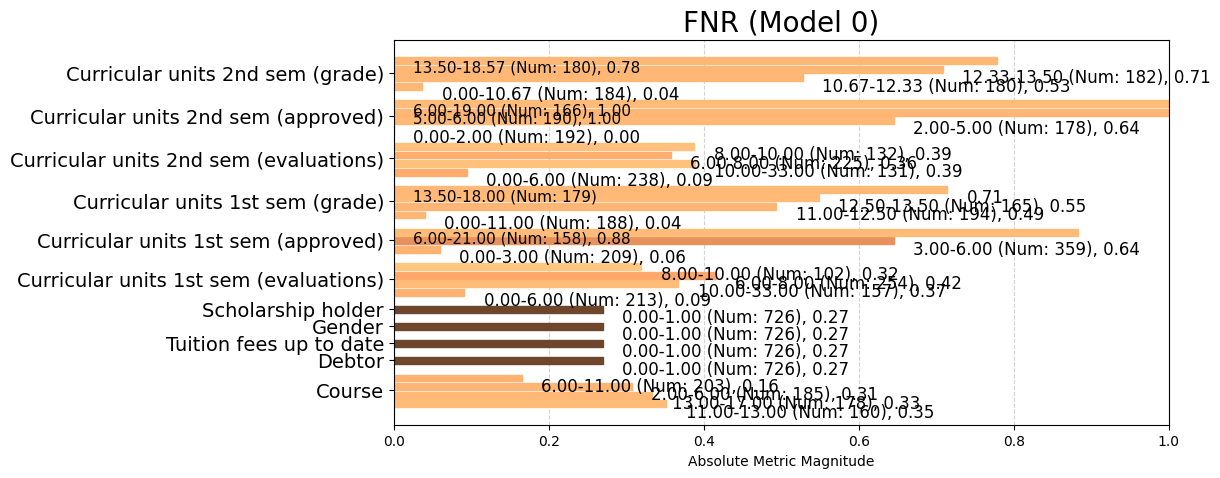

In [185]:
fnr = aqp.plot_group_metric(xtab_short, 'fnr')
# fnr.set_figheight(2)

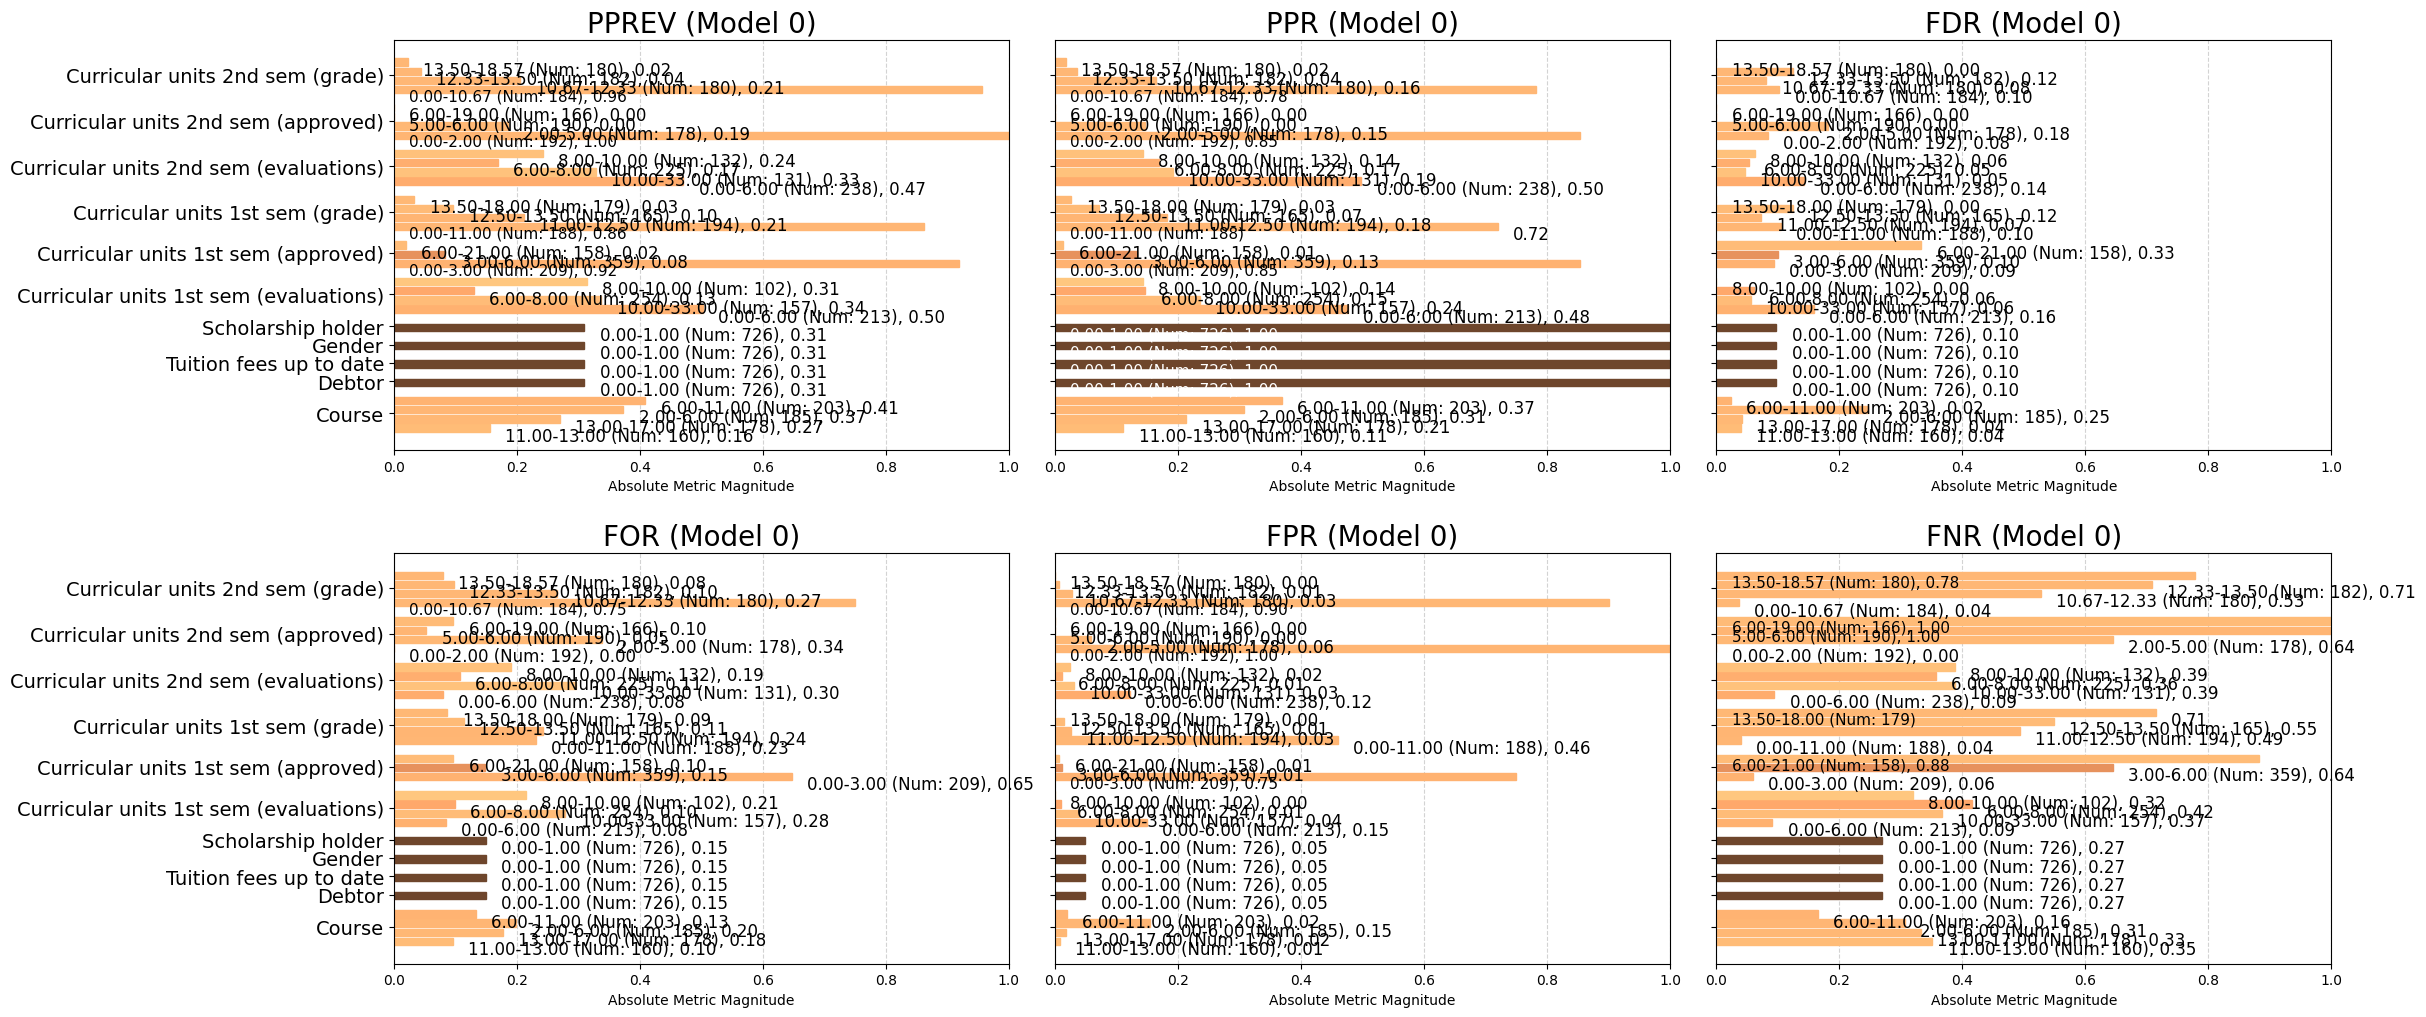

<Figure size 640x480 with 0 Axes>

In [181]:
a = aqp.plot_group_metric_all(xtab_short, ncols=3)

In [151]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [161]:
# ap.summary(bdf, metrics, fairness_threshold = disparity_tolerance)

In [157]:
ap.disparity(bdf, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [159]:
ap.absolute(bdf, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [158]:
ap.disparity(bdf, metrics, 'Curricular units 1st sem (approved)', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [160]:
ap.absolute(bdf, metrics, 'Curricular units 1st sem (approved)', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [89]:
bd = b.get_disparity_major_group(xtab, original_df=df_ae , key_columns=None, input_group_metrics=None, fill_divbyzero=None, check_significance=None, alpha=0.05, mask_significance=True)

bd.style

get_disparity_major_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,225,Marital status,1.00-5.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,225,501,1.000000,0.309917,22,75,426,203,278,448,726,726,0.382920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00-5.00,1.00-5.00,1.00-5.00,1.00-5.00,1.00-5.00,1.00-5.00,1.00-5.00,1.00-5.00,1.00-5.00,1.00-5.00
1,0,binary 0/1,225,Application mode,1.00-8.00,0.716312,0.942249,0.114286,0.158333,0.057751,0.283688,0.885714,0.841667,120,350,0.533333,0.255319,19,40,310,101,141,329,470,726,0.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00
2,0,binary 0/1,225,Application mode,12.00-17.00,0.590909,0.968254,0.227848,0.071429,0.031746,0.409091,0.772152,0.928571,28,79,0.124444,0.261682,2,18,61,26,44,63,107,726,0.411215,0.233333,1.024922,1.103253,0.451128,1.993671,0.549708,1.442045,0.824932,1.027599,0.871784,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00
3,0,binary 0/1,225,Application mode,8.00-12.00,0.817204,0.982143,0.236111,0.012987,0.017857,0.182796,0.763889,0.987013,77,72,0.342222,0.516779,1,17,55,76,93,56,149,726,0.624161,0.641667,2.024049,1.172689,0.082023,2.065972,0.309211,0.644355,1.140850,1.042339,0.862455,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00,1.00-8.00
4,0,binary 0/1,225,Course,11.00-13.00,0.648649,0.991870,0.096296,0.040000,0.008130,0.351351,0.903704,0.960000,25,135,0.111111,0.156250,1,13,122,24,37,123,160,726,0.231250,0.301205,0.382154,0.983704,1.660000,0.722222,0.430894,2.130068,0.776777,1.010944,1.042735,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00
5,0,binary 0/1,225,Course,13.00-17.00,0.666667,0.981651,0.176923,0.041667,0.018349,0.333333,0.823077,0.958333,48,130,0.213333,0.269663,2,23,107,46,69,109,178,726,0.387640,0.578313,0.659537,0.981996,1.729167,1.326923,0.972477,2.020833,0.798354,1.000529,0.949704,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00
6,0,binary 0/1,225,Course,2.00-6.00,0.693333,0.845455,0.198276,0.246377,0.154545,0.306667,0.801724,0.753623,69,116,0.306667,0.372973,17,23,93,52,75,110,185,726,0.405405,0.831325,0.912211,0.772231,10.224638,1.487069,8.190909,1.859167,0.830288,0.861713,0.925066,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00
7,0,binary 0/1,225,Course,6.00-11.00,0.835052,0.981132,0.133333,0.024096,0.018868,0.164948,0.866667,0.975904,83,120,0.368889,0.408867,2,16,104,81,97,106,203,726,0.477833,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00,6.00-11.00
8,0,binary 0/1,225,Daytime/evening attendance,0.00-1.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,225,501,1.000000,0.309917,22,75,426,203,278,448,726,726,0.382920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00,0.00-1.00
9,0,binary 0/1,225,Previous qualification,1.00-17.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850

In [92]:
bd[['attribute_name', 'attribute_value'] +
     b.list_disparities(bd) + b.list_significance(bd)].style

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Marital status,1.00-5.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Application mode,1.00-8.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Application mode,12.00-17.00,0.233333,1.024922,1.103253,0.451128,1.993671,0.549708,1.442045,0.824932,1.027599,0.871784
3,Application mode,8.00-12.00,0.641667,2.024049,1.172689,0.082023,2.065972,0.309211,0.644355,1.140850,1.042339,0.862455
4,Course,11.00-13.00,0.301205,0.382154,0.983704,1.660000,0.722222,0.430894,2.130068,0.776777,1.010944,1.042735
5,Course,13.00-17.00,0.578313,0.659537,0.981996,1.729167,1.326923,0.972477,2.020833,0.798354,1.000529,0.949704
6,Course,2.00-6.00,0.831325,0.912211,0.772231,10.224638,1.487069,8.190909,1.859167,0.830288,0.861713,0.925066
7,Course,6.00-11.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,Daytime/evening attendance,0.00-1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,Previous qualification,1.00-17.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [194]:
ap.disparity(bd, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [195]:
ap.absolute(bd, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [197]:
ap.disparity(bd, metrics, 'Curricular units 1st sem (approved)', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [198]:
ap.absolute(bd, metrics, 'Curricular units 1st sem (approved)', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [188]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=df_ae,
                                            check_significance=True)
min_metric_bdf.style

get_disparity_min_metric()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,225,Marital status,1.00-5.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,225,501,1.000000,0.309917,22,75,426,203,278,448,726,726,0.382920,True,True,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,True,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False,1.000000,1.00-5.00,False
1,0,binary 0/1,225,Application mode,1.00-8.00,0.716312,0.942249,0.114286,0.158333,0.057751,0.283688,0.885714,0.841667,120,350,0.533333,0.255319,19,40,310,101,141,329,470,726,0.300000,True,True,12.191667,8.00-12.00,True,1.551940,8.00-12.00,True,1.000000,1.00-8.00,False,3.234043,8.00-12.00,True,1.159481,8.00-12.00,True,4.285714,12.00-17.00,False,1.000000,1.00-8.00,False,1.000000,1.00-8.00,False,1.000000,1.00-8.00,False,1.212220,12.00-17.00,True
2,0,binary 0/1,225,Application mode,12.00-17.00,0.590909,0.968254,0.227848,0.071429,0.031746,0.409091,0.772152,0.928571,28,79,0.124444,0.261682,2,18,61,26,44,63,107,726,0.411215,True,True,5.500000,8.00-12.00,False,2.237968,8.00-12.00,False,1.993671,1.00-8.00,True,1.777778,8.00-12.00,False,1.010817,8.00-12.00,False,1.000000,12.00-17.00,False,1.024922,1.00-8.00,False,1.103253,1.00-8.00,False,1.027599,1.00-8.00,False,1.000000,12.00-17.00,False
3,0,binary 0/1,225,Application mode,8.00-12.00,0.817204,0.982143,0.236111,0.012987,0.017857,0.182796,0.763889,0.987013,77,72,0.342222,0.516779,1,17,55,76,93,56,149,726,0.624161,False,False,1.000000,8.00-12.00,False,1.000000,8.00-12.00,False,2.065972,1.00-8.00,True,1.000000,8.00-12.00,False,1.000000,8.00-12.00,False,2.750000,12.00-17.00,True,2.024049,1.00-8.00,True,1.172689,1.00-8.00,True,1.042339,1.00-8.00,True,1.382961,12.00-17.00,False
4,0,binary 0/1,225,Course,11.00-13.00,0.648649,0.991870,0.096296,0.040000,0.008130,0.351351,0.903704,0.960000,25,135,0.111111,0.156250,1,13,122,24,37,123,160,726,0.231250,False,False,1.660000,6.00-11.00,False,2.130068,6.00-11.00,False,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.127200,2.00-6.00,True,1.000000,11.00-13.00,False,1.000000,11.00-13.00,False,1.273846,2.00-6.00,True,1.173179,2.00-6.00,True,1.000000,11.00-13.00,False
5,0,binary 0/1,225,Course,13.00-17.00,0.666667,0.981651,0.176923,0.041667,0.018349,0.333333,0.823077,0.958333,48,130,0.213333,0.269663,2,23,107,46,69,109,178,726,0.387640,True,True,1.729167,6.00-11.00,False,2.020833,6.00-11.00,False,1.837278,11.00-13.00,False,2.256881,11.00-13.00,False,1.026634,2.00-6.00,False,1.920000,11.00-13.00,True,1.725843,11.00-13.00,True,1.271635,2.00-6.00,True,1.161093,2.00-6.00,True,1.027778,11.00-13.00,False
6,0,binary 0/1,225,Course,2.00-6.00,0.693333,0.845455,0.198276,0.246377,0.154545,0.306667,0.801724,0.753623,69,116,0.306667,0.372973,17,23,93,52,75,110,185,726,0.405405,True,True,10.224638,6.00-11.00,True,1.859167,6.00-11.00,False,2.059019,11.00-13.00,True,19.009091,11.00-13.00,True,1.000000,2.00-6.00,False,2.760000,11.00-13.00,True,2.387027,11.00-13.00,True,1.000000,2.00-6.00,False,1.000000,2.00-6.00,False,1.068889,11.00-13.00,True
7,0,binary 0/1,225,Course,6.00-11.00,0.835052,0.981132,0.133333,0.024096,0.018868,0.164948,0.866667,0.975904,83,120,0.368889,0.408867,2,16,104

In [189]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [190]:
parity_detrminations = f.list_parities(fdf)

In [191]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,Precision Parity,Impact Parity,Equalized Odds,FDR Parity,FOR Parity,Statistical Parity,Supervised Fairness,TypeII Parity,Unsupervised Fairness,TNR Parity,FPR Parity,NPV Parity,TypeI Parity,TPR Parity,FNR Parity
0,Marital status,1.00-5.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,1.000000,0.309917,0.382920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,Application mode,1.00-8.00,0.716312,0.942249,0.114286,0.158333,0.057751,0.283688,0.885714,0.841667,0.533333,0.255319,0.300000,2.216667,0.693459,0.501587,1.819149,1.147073,4.285714,0.975684,0.906410,0.973143,1.212220,True,True,False,False,False,False,False,False,False,True,False,True,False,True,False
2,Application mode,12.00-17.00,0.590909,0.968254,0.227848,0.071429,0.031746,0.409091,0.772152,0.928571,0.124444,0.261682,0.411215,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,Application mode,8.00-12.00,0.817204,0.982143,0.236111,0.012987,0.017857,0.182796,0.763889,0.987013,0.342222,0.516779,0.624161,0.181818,0.446834,1.036265,0.562500,0.989299,2.750000,1.974832,1.062937,1.014344,1.382961,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False
4,Course,11.00-13.00,0.648649,0.991870,0.096296,0.040000,0.008130,0.351351,0.903704,0.960000,0.111111,0.156250,0.231250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,Course,13.00-17.00,0.666667,0.981651,0.176923,0.041667,0.018349,0.333333,0.823077,0.958333,0.213333,0.269663,0.387640,1.041667,0.948718,1.837278,2.256881,0.910782,1.920000,1.725843,0.998264,0.989698,1.027778,True,False,False,True,False,False,False,False,False,True,False,True,False,True,True
6,Course,2.00-6.00,0.693333,0.845455,0.198276,0.246377,0.154545,0.306667,0.801724,0.753623,0.306667,0.372973,0.405405,6.159420,0.872821,2.059019,19.009091,0.887154,2.760000,2.387027,0.785024,0.852385,1.068889,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True
7,Course,6.00-11.00,0.835052,0.981132,0.133333,0.024096,0.018868,0.164948,0.866667,0.975904,0.368889,0.408867,0.477833,0.602410,0.469469,1.384615,2.320755,0.959016,3.320000,2.616749,1.016566,0.989174,1.287371,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False
8,Daytime/evening attendance,0.00-1.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,1.000000,0.309917,0.382920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,Previous qualification,1.00-17.00,0.730216,0.950893,0.149701,0.097778,0.049107,0.269784,0.850299,0.902222,1.000000,0.309917,0.382920,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [192]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,Age at enrollment,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False
1,0,binary 0/1,Application mode,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
2,0,binary 0/1,Course,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,0,binary 0/1,Curricular units 1st sem (approved),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,binary 0/1,Curricular units 1st sem (credited),True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,0,binary 0/1,Curricular units 1st sem (enrolled),False,False,False,False,True,False,False,True,True,True,False,False,False,False,False
6,0,binary 0/1,Curricular units 1st sem (evaluations),False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
7,0,binary 0/1,Curricular units 1st sem (grade),False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
8,0,binary 0/1,Curricular units 1st sem (without evaluations),True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,0,binary 0/1,Curricular units 2nd sem (approved),False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [193]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}